In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import os 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import LogNorm
from matplotlib.colors import TwoSlopeNorm
from matplotlib.ticker import FuncFormatter
from matplotlib.colors import LinearSegmentedColormap

matplotlib.rcParams.update({"font.size":12})

from EEM import RE,ABS,RMSE,IE,RE_A,RATIO,LOGRATIO,_preprocess_data


In [ ]:


# Paramètres
detailed = pd.read_csv("Processing_Detailed.csv")
list_species = ["Y_H2O","Y_NH3","Y_OH","Y_HNO"]  # mettre tes espèces

# list_species = [col for col in detailed.columns if col.startswith("Y_") ]


X = 0
T = 1000
Phi = 0.8

df_subset = detailed.loc[
    (detailed["T_Init"] == T) & (detailed["Phi_Init"] == Phi),
    list_species+["common_grid","T_Init","Phi_Init"]
].iloc[X:]
time = df_subset["common_grid"].values


# Initialisation des DataFrames
df_up = df_subset.copy()
df_down = df_subset.copy() 

## OFFSET 
factor = 0.2
for sp in list_species:
    df_up[sp] = df_up[sp]* (1+factor) 
    df_down[sp] = df_down[sp] * (1-factor)

## Scale 
# factor = 1.2
# for sp in list_species:
#     df_up[sp] = df_up[sp]* factor
#     df_down[sp] = df_down[sp] / factor


# Ajouter les colonnes de condition
df_up["T_Init"] = T
df_up["Phi_Init"] = Phi
df_up["common_grid"] =time

df_down["T_Init"] = T
df_down["Phi_Init"] = Phi
df_down["common_grid"] =time

Y_H2O
Y_NH3
Y_OH
Y_HNO


In [55]:
df_subset_log, df_up_log = _preprocess_data(df_subset,df_up,list_species,True,None)
df_subset_mm,df_up_mm = _preprocess_data(df_subset,df_up,list_species,False,"minmax")
df_subset_std,df_up_std = _preprocess_data(df_subset,df_up,list_species,False,"standard")
df_subset_log_mm,df_up_log_mm = _preprocess_data(df_subset,df_up,list_species,True,"minmax")
df_subset_log_std,df_up_log_std = _preprocess_data(df_subset,df_up,list_species,True,"standard")



_, df_down_log = _preprocess_data(df_subset,df_down,list_species,True,None)
_,df_down_mm = _preprocess_data(df_subset,df_down,list_species,False,"minmax")
_,df_down_std = _preprocess_data(df_subset,df_down,list_species,False,"standard")
_,df_down_log_mm = _preprocess_data(df_subset,df_down,list_species,True,"minmax")
_,df_down_log_std = _preprocess_data(df_subset,df_down,list_species,True,"standard")

3.905514359393847e-06
-2.114270980166366e-06
-2.309992841002806e-06
1.3747571329710473e-05
[np.float64(3494.617221051468), np.float64(5737.7409831752375), np.float64(5102.442305416034), np.float64(209.52085629907688)]
[1.         1.64187967 1.46008618 0.05995531]


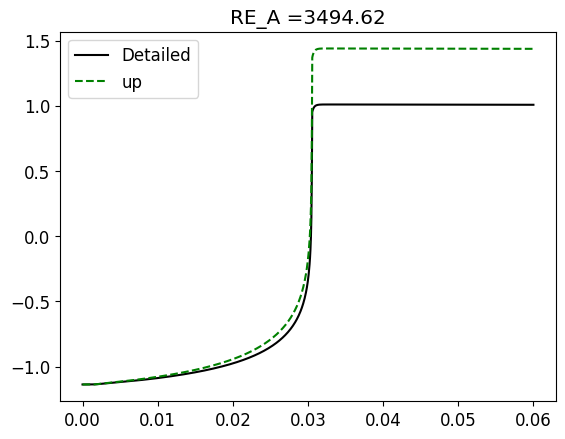

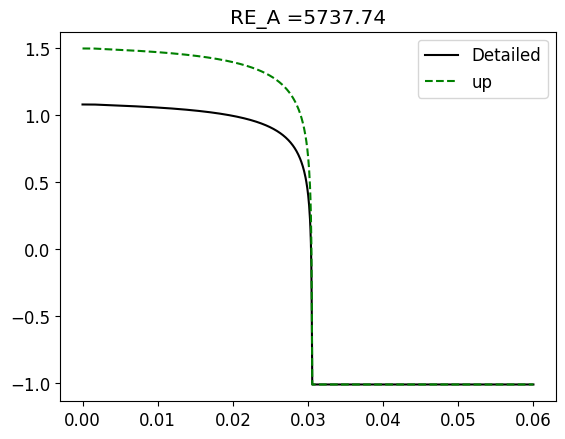

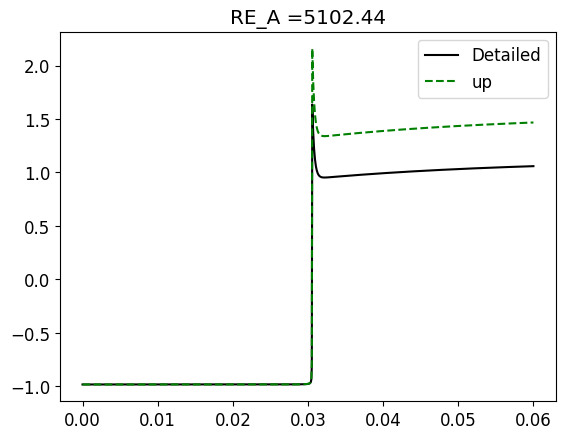

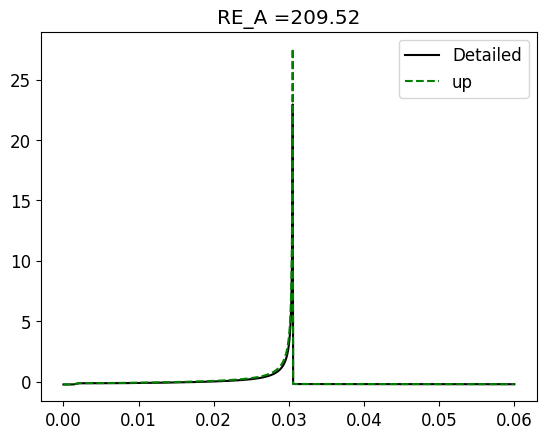

In [68]:
d = df_subset_std
u = df_up_std
tot = []
for sp in list_species : 
    plt.figure() 
    plt.plot(time,d[sp],'k',label="Detailed")
    plt.plot(time,u[sp],'g--',label='up')
    err_rea = np.abs(np.trapezoid(d[sp], time) - np.trapezoid(u[sp], time)) / np.abs(np.trapezoid(d[sp], time))
    print(np.trapezoid(d[sp], time))
    plt.title(f"RE_A ={err_rea:.2f}")

    # plt.twinx() 
    # err_abs = np.abs(d[sp]-u[sp] )**2
    # err_re = np.abs(d[sp]-u[sp] )/np.maximum(np.abs(d[sp]),1e-12)
    # # print(err_abs)
    # plt.plot(time,err_abs,'r-.',label=f"ABS = {np.sum(err_abs):.2f}")
    
    tot.append(err_rea)
    plt.legend()
print(tot)
print(tot/tot[0])

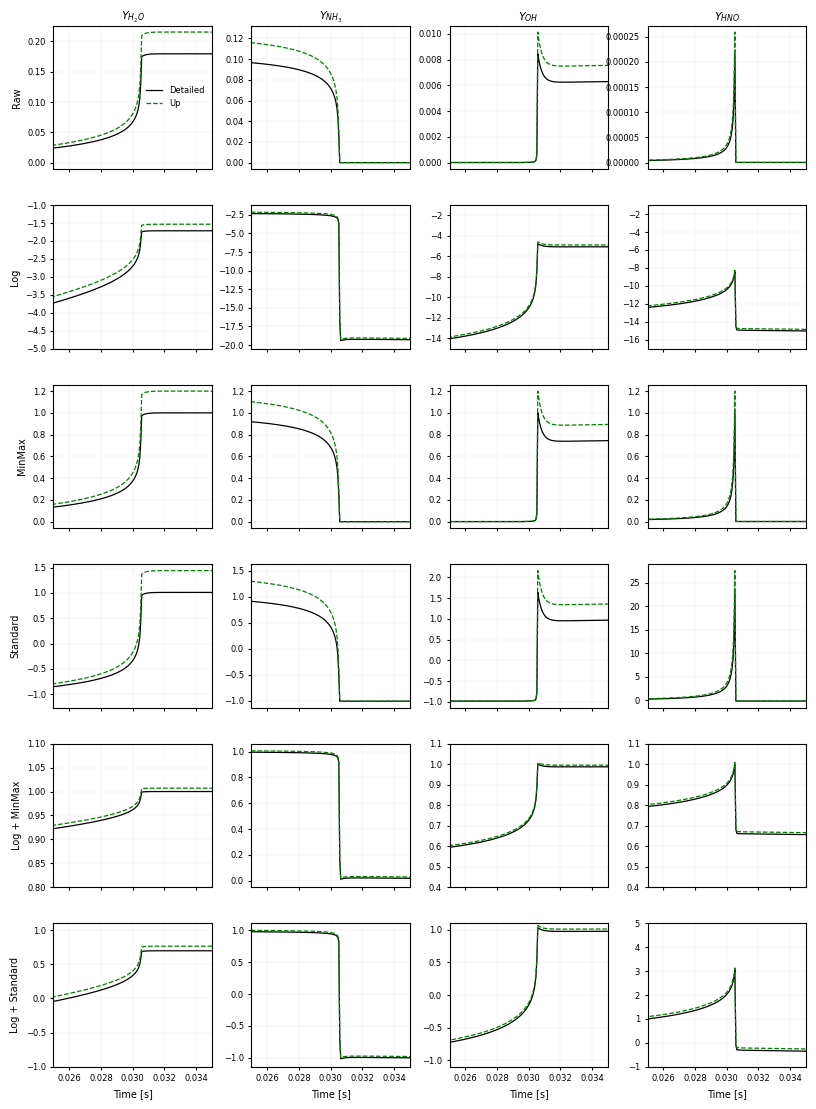

In [42]:
# Définition des transformations et des DataFrames associés
transformations = [
    ("Raw", df_subset, df_up,df_down),
    ("Log", df_subset_log, df_up_log,df_down_log),
    ("MinMax", df_subset_mm, df_up_mm,df_down_mm),
    ("Standard", df_subset_std, df_up_std,df_down_std),
    ("Log + MinMax", df_subset_log_mm, df_up_log_mm,df_down_log_mm),
    ("Log + Standard", df_subset_log_std, df_up_log_std,df_down_log_std)
]
notation=[r"$Y_{H_2O}$",r"$Y_{NH_3}$",r"$Y_{OH}$",r"$Y_{HNO}$"]

# --- PARAMÈTRES VISUELS OPTIMISÉS POUR A4 ---
fig, axes = plt.subplots(
    nrows=6, ncols=4, figsize=(8.27, 11.7), sharex=True, sharey=False
)
plt.subplots_adjust(hspace=0.25, wspace=0.25, top=0.95, bottom=0.06, left=0.07, right=0.98)

for i, (label, df_s, df_u,df_d) in enumerate(transformations):
    for j, species in enumerate(list_species):
        ax = axes[i, j]
        ax.plot(time, df_s[species], label="Detailed", color="k", linewidth=0.9)
        ax.plot(time, df_u[species], label="Up", color="g", linestyle="--", linewidth=0.9)
        # ax.plot(time, df_d[species], label="Down", color="r", linestyle="--", linewidth=0.9)
        ax.set_xlim([0.025,0.035])
        
        # En-têtes de colonnes (uniquement première ligne)
        if i == 0:
            ax.set_title(notation[j], fontsize=8, pad=4)
        # Lignes : label de la transformation
        if j == 0:
            ax.set_ylabel(label, fontsize=7)
        # Axes x uniquement dernière ligne
        if i == len(transformations) - 1:
            ax.set_xlabel("Time [s]", fontsize=7)
            
            
        ### Modification Specificique 
        if label == "Log" and species == "Y_H2O" : 
            ax.set_ylim([-5,-1])
            
        if label == "Log" and species == "Y_OH" : 
            ax.set_ylim([-15,-1])
            
        if label == "Log" and species == "Y_HNO" : 
            ax.set_ylim([-17,-1])
            
        if label == "Log + MinMax" and species == "Y_H2O" : 
            ax.set_ylim([0.8,1.1])
            
        if label == "Log + MinMax" and species == "Y_OH" : 
            ax.set_ylim([0.4,1.1])
            
        if label == "Log + MinMax" and species == "Y_HNO" : 
            ax.set_ylim([0.4,1.1])
        
        if label == "Log + Standard" and species == "Y_H2O" : 
            ax.set_ylim([-1,1.1])
            
        if label == "Log + Standard" and species == "Y_OH" : 
            ax.set_ylim([-1.1,1.1])
            
        if label == "Log + Standard" and species == "Y_HNO" : 
            ax.set_ylim([-1,5])
            
            
            
        ax.tick_params(labelsize=6, length=2)
        ax.grid(alpha=0.25, linewidth=0.3)

# Une seule légende compacte
axes[0, 0].legend(frameon=False, fontsize=6, loc="center right")
plt.savefig("4_species_UD_All_transfo_Offset.pdf")
plt.show()

In [32]:
# listes des métriques et des directions
metrics = ["RE", "ABS", "RMSE", "RE_A"]
directions = {"up": df_up, "down": df_down}

# 1️⃣ Sans log ni normalisation
all_errors = {}
for m in metrics:
    for dname, ddata in directions.items():
        key = f"{m}_{dname}"
        all_errors[key] = globals()[f"{m}"](df_subset, ddata, list_species, flag_output=True)


# 2️⃣ Avec log
all_errors_log = {}
for m in metrics:
    for dname, ddata in directions.items():
        key = f"{m}_{dname}"
        all_errors_log[key] = globals()[f"{m}"](df_subset, ddata, list_species, flag_output=True, do_log=True)

# 3️⃣ Normalisation Standard
all_error_norm_S = {}
for m in metrics:
    for dname, ddata in directions.items():
        key = f"{m}_{dname}"
        all_error_norm_S[key] = globals()[f"{m}"](df_subset, ddata, list_species, flag_output=True, norm_type="standard")

# 4️⃣ Log + Normalisation Standard
all_error_log_norm_S = {}
for m in metrics:
    for dname, ddata in directions.items():
        key = f"{m}_{dname}"
        all_error_log_norm_S[key] = globals()[f"{m}"](df_subset, ddata, list_species, flag_output=True, do_log=True, norm_type="standard")

# 3️⃣ Normalisation Standard
all_error_norm_M = {}
for m in metrics:
    for dname, ddata in directions.items():
        key = f"{m}_{dname}"
        all_error_norm_M[key] = globals()[f"{m}"](df_subset, ddata, list_species, flag_output=True, norm_type="minmax")

# 4️⃣ Log + Normalisation Standard
all_error_log_norm_M = {}
for m in metrics:
    for dname, ddata in directions.items():
        key = f"{m}_{dname}"
        all_error_log_norm_M[key] = globals()[f"{m}"](df_subset, ddata, list_species, flag_output=True, do_log=True, norm_type="minmax")


In [33]:
all_errors_log["ABS_up"]

Species,Phi_Init,T_Init,Y_H2O,Y_HNO,Y_NH3,Y_OH
0,0.8,1000,182.139235,181.409949,182.321557,182.139235


KeyError: 'RE_down'

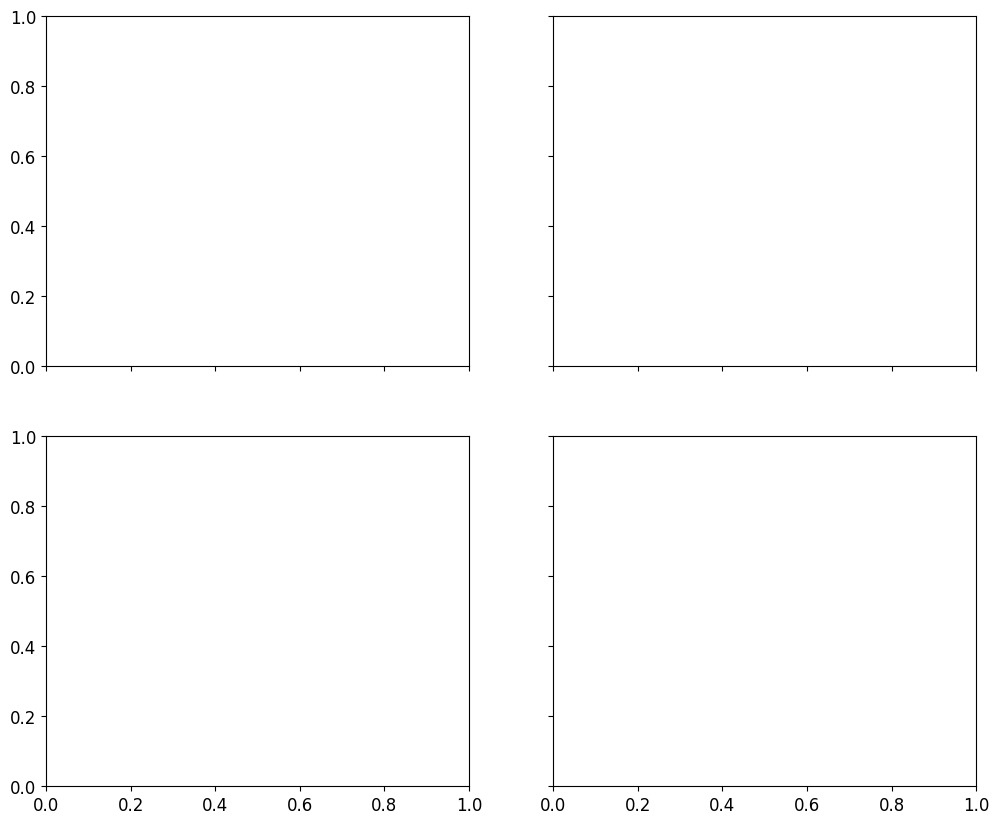

In [40]:

# Paramètres
error_types = metrics
species_cols = list_species[:4]  # 4 espèces pour le 2x2
n = 6                     # nombre de types
width = 0.15              # largeur de chaque barre
offsets = np.linspace(- (n-1)/2*width, (n-1)/2*width, n)

# Labels et couleurs
labels = ["Normal", "Log", "Std", "Log+Std","Mm","Log+Mm"]
colors = ["#F3DFA2", "#7EBDC2", "#9D8179", "#BB4430", "#6B9C82", "#C58C85"]

# Liste des dictionnaires pour les 4 combinaisons
dicts_ratio = [all_errors, all_errors_log, all_error_norm_S, all_error_log_norm_S,all_error_norm_M,all_error_log_norm_M]



# Création figure 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, sp in enumerate(species_cols):
    ax = axes[i]
    x = np.arange(len(error_types))

    for j in range(len(dicts_ratio)):
        vals = []
        for err in error_types:
                
            val_up = dicts_ratio[j][f"{err}_up"].set_index(["T_Init","Phi_Init"])[sp].values[0]
            val_down = dicts_ratio[j][f"{err}_down"].set_index(["T_Init","Phi_Init"])[sp].values[0]
            ratio = val_down / val_up
            vals.append(ratio)
        ax.bar(x + offsets[j], vals, width, color=colors[j], alpha=0.85,
               label=labels[j] if i==0 else "")

    # ax.set_yscale("log")
    ax.set_title(sp, fontsize=14, fontweight="bold")
    ax.grid(axis="y", linestyle="--", alpha=0.6)
    ax.set_ylim([0, 2])
    ax.set_ylabel(r"$\epsilon(down)/\epsilon(up)$",fontsize=12)
    # Afficher les labels x sur tous les axes
    ax.set_xticks(np.arange(len(error_types)))
    ax.set_xticklabels(error_types, rotation=45, fontsize=15)

# Légende globale au-dessus
handles, legend_labels = axes[0].get_legend_handles_labels()
fig.legend(handles, legend_labels, loc='upper center', ncol=3, fontsize=12, frameon=False)
plt.tight_layout(rect=[0,0,1,0.93])  # laisser de l'espace pour la légende
plt.savefig("UD_Ratio_Offset.png")


In [37]:
# listes des métriques et des directions
metrics = ["RE", "ABS", "RMSE", "RE_A"]
directions = {"up": df_up}

# 1️⃣ Sans log ni normalisation
all_errors = {}
for m in metrics:
    for dname, ddata in directions.items():
        key = f"{m}_{dname}"
        all_errors[key] = globals()[f"{m}"](df_subset, ddata, list_species, flag_output=True)


# 2️⃣ Avec log
all_errors_log = {}
for m in metrics:
    for dname, ddata in directions.items():
        key = f"{m}_{dname}"
        all_errors_log[key] = globals()[f"{m}"](df_subset, ddata, list_species, flag_output=True, do_log=True)

# 3️⃣ Normalisation Standard
all_error_norm_S = {}
for m in metrics:
    for dname, ddata in directions.items():
        key = f"{m}_{dname}"
        all_error_norm_S[key] = globals()[f"{m}"](df_subset, ddata, list_species, flag_output=True, norm_type="standard")

# 4️⃣ Log + Normalisation Standard
all_error_log_norm_S = {}
for m in metrics:
    for dname, ddata in directions.items():
        key = f"{m}_{dname}"
        all_error_log_norm_S[key] = globals()[f"{m}"](df_subset, ddata, list_species, flag_output=True, do_log=True, norm_type="standard")

# 3️⃣ Normalisation Standard
all_error_norm_M = {}
for m in metrics:
    for dname, ddata in directions.items():
        key = f"{m}_{dname}"
        all_error_norm_M[key] = globals()[f"{m}"](df_subset, ddata, list_species, flag_output=True, norm_type="minmax")

# 4️⃣ Log + Normalisation Standard
all_error_log_norm_M = {}
for m in metrics:
    for dname, ddata in directions.items():
        key = f"{m}_{dname}"
        all_error_log_norm_M[key] = globals()[f"{m}"](df_subset, ddata, list_species, flag_output=True, do_log=True, norm_type="minmax")

# dicts_ratio = [all_errors, all_errors_log, all_error_norm_S, all_error_log_norm_S,all_error_norm_M,all_error_log_norm_M]
# dicts_ratio= [ all_errors_log,  all_error_log_norm_S,all_error_log_norm_M]
dicts_ratio = [all_errors, all_error_norm_S,all_error_norm_M]


In [38]:
error_types = ["RE","ABS", "RMSE", "RE_A"]
transfo_labels = ["Raw", "Log", "Std", "Log+Std","Mm","Log+Mm"]
# transfo_labels = ["Log", "Log+Std","Log+Mm"]
transfo_labels = ["Raw", "Std","Mm"]
list_species = ["Y_H2O","Y_NH3","Y_OH","Y_HNO"]

notation1=[r"$Y_{H_2O}$",r"$Y_{NH_3}$",r"$Y_{OH}$",r"$Y_{HNO}$"]
notation=[r"$Y_{NH_3}$",r"$Y_{OH}$",r"$Y_{HNO}$"]

def build_matrix(direction):
    """Construit un dict {error_type: DataFrame} pour fwd ou bwd"""
    matrices = {}
    for err in error_types:
        matrix = np.zeros((len(list_species), len(transfo_labels)))
        for i, sp in enumerate(list_species):
            for j, d in enumerate(dicts_ratio):  # transformations
                val = d[f"{err}_{direction}"].set_index(["T_Init","Phi_Init"])[sp].values[0]
                matrix[i, j] = val
        df = pd.DataFrame(matrix, index=notation1, columns=transfo_labels)
        matrices[err] = df
    return matrices



def build_matrix2(direction, species_ref="Y_H2O"):
    """Construit un dict {error_type: DataFrame} normalisé par l'espèce species_ref"""
    matrices = {}
    
    # liste des espèces sans référence
    species_others = [s for s in list_species if s != species_ref]
    # species_others = list_species
    for err in error_types:
        matrix = np.zeros((len(species_others), len(transfo_labels)))
        for j, d in enumerate(dicts_ratio):
            # valeur de référence
            ref = d[f"{err}_{direction}"].set_index(["T_Init","Phi_Init"])[species_ref].values[0]
            for i, sp in enumerate(species_others):
                val = d[f"{err}_{direction}"].set_index(["T_Init","Phi_Init"])[sp].values[0]
                matrix[i, j] = val / ref if ref != 0 else np.nan

        # creation DataFrame
        df = pd.DataFrame(matrix,
                          index=notation,
                          columns=transfo_labels)
        matrices[err] = df

    return matrices





/tmp/ipykernel_774371/2809702685.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,0.9,1])


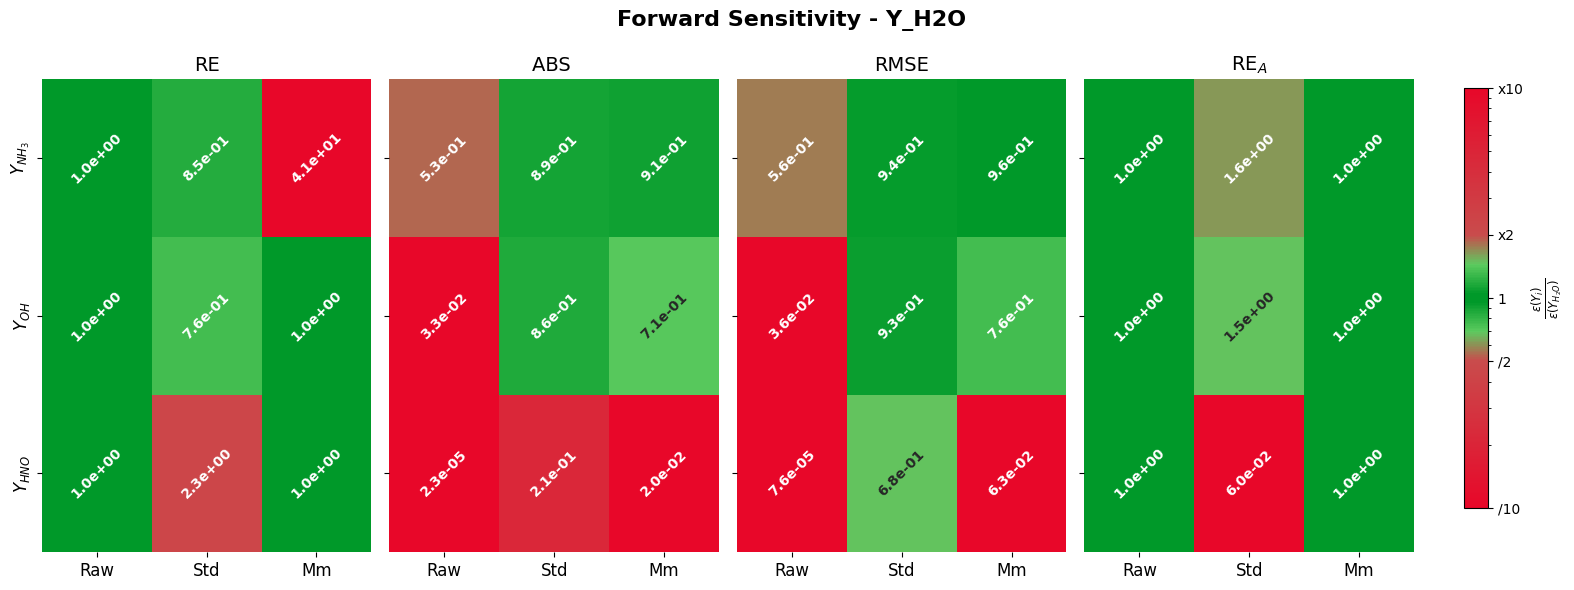

In [39]:

# Exemple : matrice
fwd_matrices = build_matrix2("up","Y_H2O")


fig, axes = plt.subplots(1, 4, sharey=True, sharex=True, figsize=(16,6))

# Paramètres de l'échelle
vmin = 0.1
vmax = 10
center = 1

# Couleurs personnalisées : rouge foncé → vert clair → rouge foncé
colors = [
    (0.0, "#e80729"),   # rouge foncé début
    (0.35, "#C94C4C"),   # rouge intermédiaire
    (0.42, "#5ccb5f"),  # début vert clair
    (0.49,"#009929"), 
    (0.51,"#009929"),
    (0.58, "#5ccb5f"),  # fin vert
    (0.65, "#C94C4C"),   # rouge intermédiaire après vert
    (1.0, "#e80729")    # rouge foncé fin
]
cmap = LinearSegmentedColormap.from_list("CustomRedGreenRed", colors)

# Norme logarithmique pour symétrie autour de 1
norm = LogNorm(vmin=vmin, vmax=vmax)

# Heatmaps
hm0 = sns.heatmap(fwd_matrices["RE"], ax=axes[0], annot=True, fmt=".1e",
                  annot_kws={"size": 10, "rotation": 45, "fontweight": "bold"},
                  cbar=False, cmap=cmap, norm=norm)

hm0 = sns.heatmap(fwd_matrices["ABS"], ax=axes[1], annot=True, fmt=".1e",
                  annot_kws={"size": 10, "rotation": 45, "fontweight": "bold"},
                  cbar=False, cmap=cmap, norm=norm)
hm1 = sns.heatmap(fwd_matrices["RMSE"], ax=axes[2], annot=True, fmt=".1e",
                  annot_kws={"size": 10, "rotation": 45, "fontweight": "bold"},
                  cbar=False, cmap=cmap, norm=norm)
hm2 = sns.heatmap(fwd_matrices["RE_A"], ax=axes[3], annot=True, fmt=".1e",
                  annot_kws={"size": 10, "rotation": 45, "fontweight": "bold"},
                  cbar=False, cmap=cmap, norm=norm)

# Colorbar dédiée
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
cbar = fig.colorbar(hm2.collections[0], cax=cbar_ax, ticks=[0.1,0.5,1,2,10])
cbar.ax.set_yticklabels(["/10","/2","1","x2","x10"], fontsize=10)
cbar.set_label(r"$\frac{\epsilon(Y_i)}{\epsilon(Y_{H_2O})}$")


# Titres
axes[0].set_title("RE",fontsize=14)
axes[1].set_title("ABS ", fontsize=14)
axes[2].set_title("RMSE", fontsize=14)
axes[3].set_title(r"RE$_A$", fontsize=14)
fig.suptitle("Forward Sensitivity - Y_H2O", fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0,0,0.9,1])

plt.savefig(f"UD_sensitivity_H2O_offset.png")
plt.show()



In [25]:
fwd_matrices["RE"]

,Log,Log+Std,Log+Mm
$Y_{NH_3}$,1.000968,0.625337,0.848600
$Y_{OH}$,0.999988,0.333739,0.756781
$Y_{HNO}$,0.997070,0.179253,2.292724
